## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements & config

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.2f}'.format)

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv(
    "Data_files/QueryResults.csv",
    names=['DATE', 'TAG', 'POSTS'],
    header=0,
    parse_dates=['DATE']
)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()
# df.tail()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1991 non-null   datetime64[ns]
 1   TAG     1991 non-null   object        
 2   POSTS   1991 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 46.8+ KB


In [5]:
bool_nan_check_series = df.isna().any(axis=1)
bool_nan_check_series.sum()

0

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df['TAG'].nunique()
# 14

14

In [7]:
# Number of monhts from which a data was collected for a given language
df.groupby("TAG")["DATE"].nunique()

# Total number of posts for each language
df.groupby("TAG")["POSTS"].sum().sort_values(ascending=False)
df.groupby("TAG")["POSTS"].sum().sort_values(ascending=False).apply("{:,}".format)

TAG
javascript    2,056,510
java          1,696,403
python        1,496,210
c#            1,423,530
php           1,361,988
c++             684,210
r               356,799
c               336,042
swift           273,055
ruby            214,582
perl             65,286
go               47,499
delphi           46,212
assembly         34,852
Name: POSTS, dtype: object

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby("TAG")["DATE"].count().sort_values()

TAG
go            129
swift         135
r             142
assembly      144
c             144
c++           144
delphi        144
java          144
javascript    144
perl          144
php           144
python        144
ruby          144
c#            145
Name: DATE, dtype: int64

## Data Manipulation
Can you pivot the df DataFrame so that each row is a date and each column is a programming language?


In [9]:
pivoted_df = df.pivot(
    index='DATE',
    columns='TAG',
    values='POSTS'
)
print(pivoted_df.info())
pivoted_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2008-07-01 to 2020-07-01
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   assembly    144 non-null    float64
 1   c           144 non-null    float64
 2   c#          145 non-null    float64
 3   c++         144 non-null    float64
 4   delphi      144 non-null    float64
 5   go          129 non-null    float64
 6   java        144 non-null    float64
 7   javascript  144 non-null    float64
 8   perl        144 non-null    float64
 9   php         144 non-null    float64
 10  python      144 non-null    float64
 11  r           142 non-null    float64
 12  ruby        144 non-null    float64
 13  swift       135 non-null    float64
dtypes: float64(14)
memory usage: 17.0 KB
None


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8,85,511,164,14,NaN,222,162,28,161,124,NaN,73,NaN
2008-09-01,28,321,"1,649",755,105,NaN,"1,137",640,131,482,542,6,290,NaN
2008-10-01,15,303,"1,989",811,112,NaN,"1,153",725,127,617,510,NaN,249,NaN
2008-11-01,17,259,"1,730",735,141,NaN,958,579,97,504,452,1,160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317,"2,670","8,954","5,107",181,719,"13,253","20,483",215,"6,672","26,673","5,761",780,"3,434"
2020-04-01,406,"3,472","10,042","6,820",250,887,"15,377","24,634",240,"8,060","32,605","7,047",860,"4,015"
2020-05-01,386,"3,602","9,923","7,063",221,826,"14,711","25,196",228,"7,917","34,478","6,833",774,"4,066"


In [10]:
print(pivoted_df.isna().values.any())

pivoted_df.fillna(value=0, inplace=True)
pivoted_df

True


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0,0,3,0,0,0,0,0,0,0,0,0,0,0
2008-08-01,8,85,511,164,14,0,222,162,28,161,124,0,73,0
2008-09-01,28,321,"1,649",755,105,0,"1,137",640,131,482,542,6,290,0
2008-10-01,15,303,"1,989",811,112,0,"1,153",725,127,617,510,0,249,0
2008-11-01,17,259,"1,730",735,141,0,958,579,97,504,452,1,160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317,"2,670","8,954","5,107",181,719,"13,253","20,483",215,"6,672","26,673","5,761",780,"3,434"
2020-04-01,406,"3,472","10,042","6,820",250,887,"15,377","24,634",240,"8,060","32,605","7,047",860,"4,015"
2020-05-01,386,"3,602","9,923","7,063",221,826,"14,711","25,196",228,"7,917","34,478","6,833",774,"4,066"


In [15]:
pivoted_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

(0.0, 36000.0)

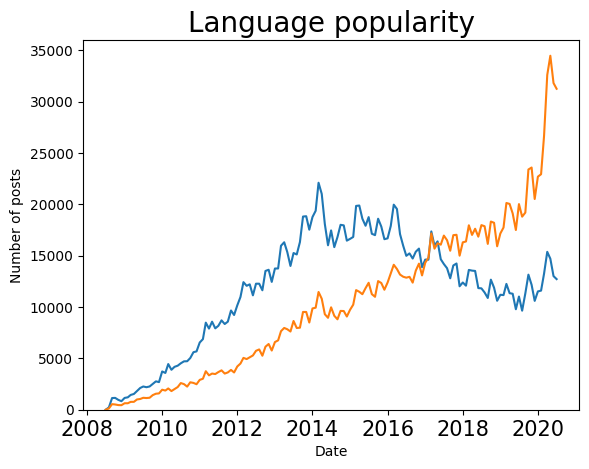

In [27]:
plt.plot(pivoted_df.index, pivoted_df['java'])
plt.plot(pivoted_df.index, pivoted_df['python'])
plt.xlabel('Date')
plt.ylabel('Number of posts')
plt.title('Language popularity', fontsize=20)
plt.xticks(fontsize=15)
plt.ylim(0, 36000)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000'),
  Text(0, 40000.0, '40000')])

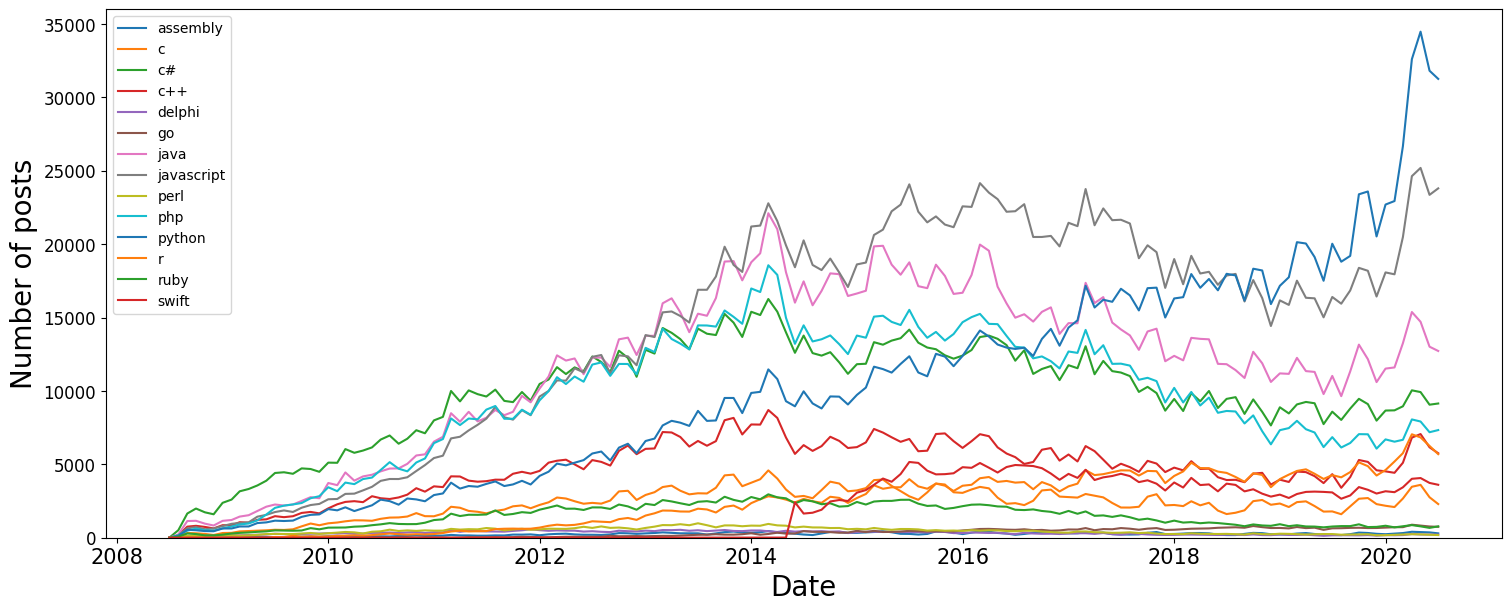

In [45]:
plt.figure(figsize=(15, 6), layout='constrained')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of posts', fontsize=20)

for col in pivoted_df:
    plt.plot(pivoted_df.index, pivoted_df[col], label=col)

plt.legend()
plt.ylim(0, 36000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000')])

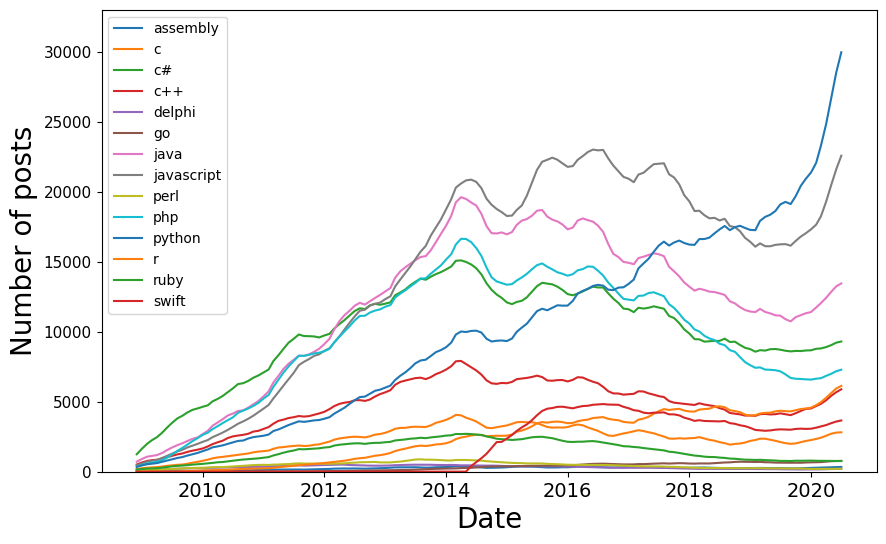

In [58]:
roll_df = pivoted_df.rolling(window=6).mean()

plt.figure(figsize=(10, 6))
for lang in roll_df.columns:
    plt.plot(
        roll_df.index,
        roll_df[lang],
        label=lang
    )
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of posts', fontsize=20)
plt.legend()
plt.ylim(0, 33000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=11)

### Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [59]:
roll_df.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='DATE', length=145, freq=None)